In [1]:
import networkx as nx
import SimpleITK as sitk
import scipy
import skimage
from utils import (
    preprocessing, rashno_ns_mapper, get_ilm_line, get_rpe_line, rpe_flattening,
    get_retina_mask, ns_mapper, clustering, select_seeds, get_graph_flow_adj_matrix,
    post_processing, save_segmentation, alpha_mean_beta_enh, image_from_minimum_cut
)
import time

In [2]:
def plot_slices(im, ref):
    plt.figure(figsize=(20,5))
    for k, i in enumerate(range(0, ref.shape[0],10)):
        plt.subplot(1,5,k+1)
        plt.title(f'Slice N°{i}')
        plt.imshow(im[i,:,:], cmap='gray')
        plt.imshow(ref[i,:,:], alpha=0.5)
        plt.axis('off')
    plt.show()

In [3]:
def plot_results(im, ref, retina_mask, result_clust, min_cut, segmentation):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,5,1)
    plt.title('Preprocessed + Reference')
    plt.imshow(im, cmap='gray')
    plt.imshow(ref, alpha=0.5)
    plt.axis('off')

    plt.subplot(1,5,2)
    plt.title('Retina Mask')
    plt.imshow(im, cmap='gray')
    plt.imshow(retina_mask, alpha=0.5)
    plt.axis('off')
    
    plt.subplot(1,5,3)
    plt.title('Clustering for seeds')
    plt.imshow(im, cmap='gray')
    plt.imshow(result_clust, alpha=0.5)
    plt.axis('off')
    
    plt.subplot(1,5,4)
    plt.title('Minimum Cut')
    plt.imshow(im, cmap='gray')
    plt.imshow(min_cut, alpha=0.5)
    plt.axis('off')

    plt.subplot(1,5,5)
    plt.title('Postprocessed Segmentation')
    plt.imshow(im, cmap='gray')
    plt.imshow(segmentation, alpha=0.5)
    plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

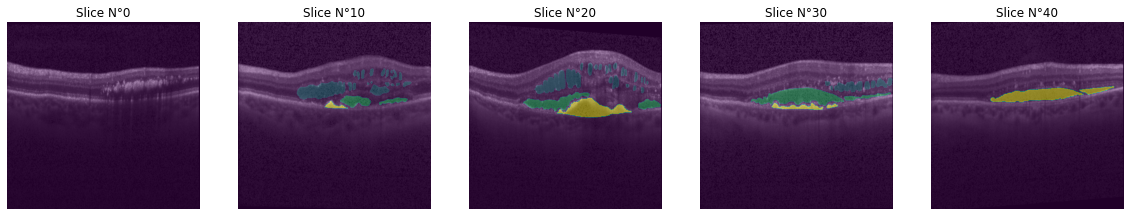

<IPython.core.display.Javascript object>

Processing Slice: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

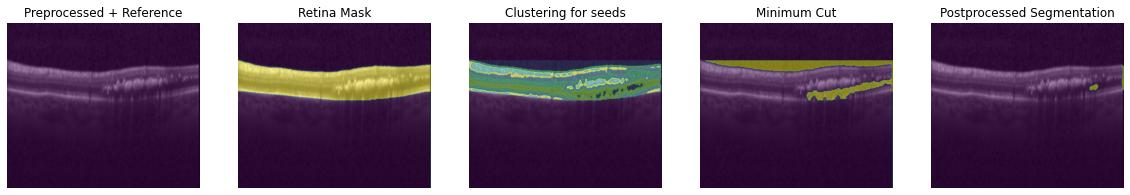

Processing Slice: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

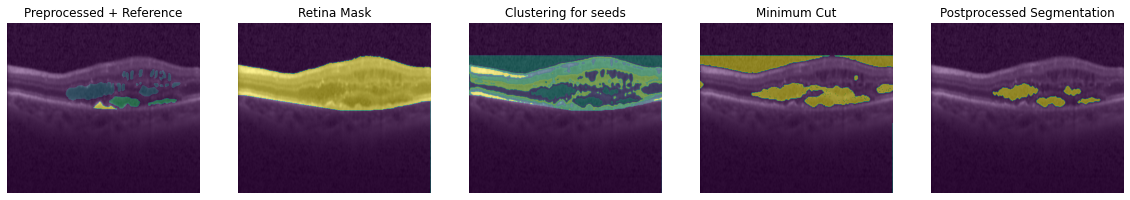

Processing Slice: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

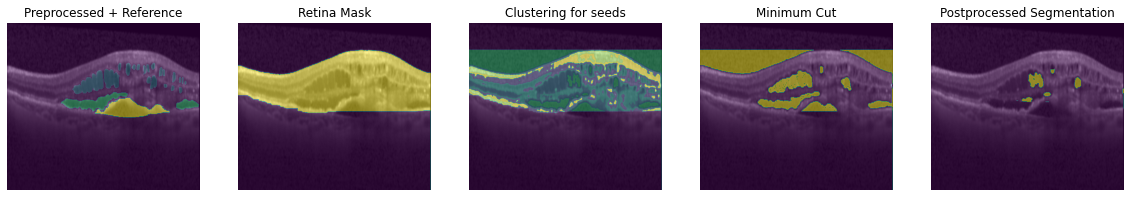

Processing Slice: 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

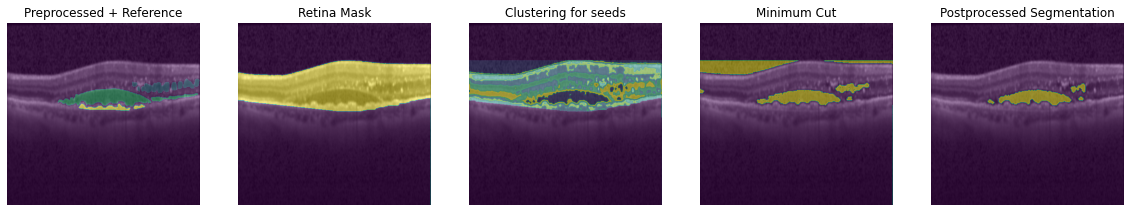

Processing Slice: 40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

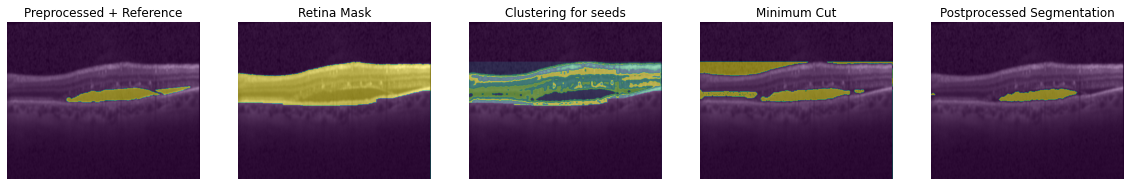

The whole processing of the oct study took: 174.95919060707092s


In [6]:
i=44
case = f'TRAIN0{i}'

# Image Loading:
manufacturer = 'Spectralis'
itkimage = sitk.ReadImage(f'../data/RETOUCH-TrainingSet-{manufacturer}/{case}/oct.mhd')
ref_itkimage = sitk.ReadImage(f'../data/RETOUCH-TrainingSet-{manufacturer}/{case}/reference.mhd')

oct_scan = sitk.GetArrayFromImage(itkimage)
ref_oct_scan = sitk.GetArrayFromImage(ref_itkimage)

# Plot some slices
plot_slices(oct_scan, ref_oct_scan)

spacing = itkimage.GetSpacing()
complete_segmentation = np.zeros(ref_oct_scan.shape)
start = time.time()
for j in range(0, ref_oct_scan.shape[0],10):
    print(f'Processing Slice: {j}')
    slice_ = j
    if j==0:
        retina_mask_prev = np.ones(ref_oct_scan[slice_, :, :].shape)
        retina_mask_2prev = np.ones(ref_oct_scan[slice_, :, :].shape)
    # Preprocess:
    im, ref, indx_start, indx_end = preprocessing(
        manufacturer, oct_scan[slice_, :, :], ref_oct_scan[slice_, :, :], itkimage.GetSpacing()
    )

    # Get the NS tranform
    T, I = rashno_ns_mapper(im)

    # Get ILM line
    g1, R, V, ilm_image = get_ilm_line(im, T, r_window=50)

    # Get RPE line and flatten()
    g2, R, U, V2, rpe_image, indices = get_rpe_line(im, T, ilm_image, r_window=150, u_window=20)
    rpe_image, _, _, _, _ = \
        rpe_flattening(rpe_image, peak_window_size=500, tr=80, k_size=101, iterations=3)

    # Get retina mask
    retina_mask = get_retina_mask(ilm_image.copy(), rpe_image.copy())
    alt_retina_mask = get_retina_mask(ilm_image.copy(), rpe_image.copy(), alt=True)

    # Resize to reduce computation
    rel = spacing[1]/spacing[0]
    im_or = im.copy()
    ref_or = ref.copy()
    im = scipy.ndimage.zoom(im, (1, rel), order=3, mode='reflect', prefilter=False)
    ref = scipy.ndimage.zoom(ref, (1, rel), order=0, prefilter=False)
    retina_mask = scipy.ndimage.zoom(retina_mask, (1, rel), order=0, prefilter=False)
    alt_retina_mask = scipy.ndimage.zoom(alt_retina_mask, (1, rel), order=0, prefilter=False)

    # Neutrosophic transform and alpha mean beta enhacement
    im_NS = ns_mapper(im, inversion=True)
    _, T_am_be, betaI = alpha_mean_beta_enh(im_NS)

    # Kmeans clustering
    result_clust = clustering(T_am_be, alt_retina_mask, 6)

    # Seeds sampling
    fluid_seeds, bkg_seeds, clusters_centers, indices = \
        select_seeds(T_am_be, result_clust, FN=500, TN=700, n_clust_object=1)
    indices = indices-1

    # Obtain the full weigthed graph
    graph_, nodes = get_graph_flow_adj_matrix(
        T_am_be, alt_retina_mask, betaI, fluid_seeds,
        bkg_seeds, lamda1=1e8, lamda2=1e8, directed=False
    )

    # Get mincut
    G = nx.from_scipy_sparse_matrix(graph_, create_using=nx.Graph, edge_attribute='capacity')
    cut_value, partition = nx.minimum_cut(G, 0, graph_.shape[0]-1)
    min_cut = image_from_minimum_cut(partition, T_am_be.shape, nodes)

    # Post process segmentation
    segmentation, segm, labels, final_ = \
        post_processing(min_cut, T_am_be, result_clust, retina_mask, indices, Tr=50)


    # Save the slice
    complete_segmentation[slice_, indx_start:indx_end, :] = segmentation
    complete_segmentation[slice_, :, :] = \
        complete_segmentation[slice_, :, :]*retina_mask_2prev

    # Acumulate previous retina masks
    retina_mask_2prev = retina_mask_prev
    retina_mask_prev = np.zeros(complete_segmentation[slice_,:,:].shape)
    retina_mask_prev[indx_start:indx_end, :] = retina_mask
    
    # Plot partial results
    plot_results(
        im, ref, retina_mask, result_clust, min_cut, complete_segmentation[slice_, indx_start:indx_end, :]
    )
print(f'The whole processing of the oct study took: {time.time()-start}s')